In [1]:
# a Kalman filter depends pretty heavily on different values of Q. What's the best one?

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats, signal, optimize

from aberrations import *
from observer import *

In [2]:
vibe_aberrations = make_1D_vibe_data(N=1)
measurements = make_noisy_data(vibe_aberrations, noise=0.06)

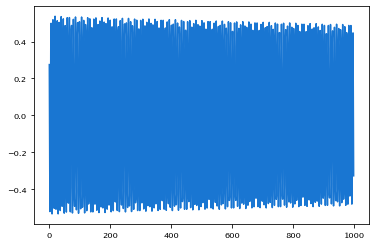

In [3]:
plt.plot(vibe_aberrations)

In [4]:
state, A, P, Q, H, R = make_kfilter(*vibe_fit_freq(noise_filter(get_psd(measurements)), N=1))
Q

array([[4.04876464e-05, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00]])

In [27]:
steps = vibe_aberrations.size

def kf_to_optimize(q):
    state, A, P, _, H, R = make_kfilter(*vibe_fit_freq(noise_filter(get_psd(measurements)), N=1))
    Q = np.array([[q, 0], [0, 0]], dtype='float')
    states_freq = np.zeros((steps, state.size))
    for k in range(steps):
        state, P = update(H, P, R, state, measurements[k])
        states_freq[k] = state
        state, P = predict(A, P, Q, state)

    pos_freq = np.array([H.dot(state) for state in states_freq]).flatten()
    return np.sqrt(np.mean((pos_freq - vibe_aberrations)**2)), pos_freq, P


q0 = Q[0][0]
res = optimize.minimize(lambda q: kf_to_optimize(q)[0], [q0], method='Nelder-Mead')

In [28]:
res_base = kf_to_optimize(q0)
res_base[0]

0.2350050933215494

In [29]:
print(res.x)
res_opt = kf_to_optimize(res.x)
res_opt[0]

[0.04175693]


0.06522700533785557

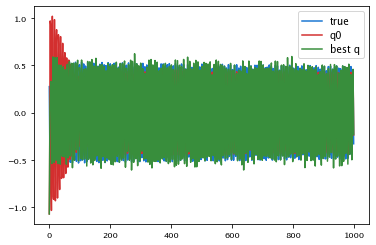

In [30]:
plt.plot(vibe_aberrations, label='true')
plt.plot(res_base[1], label='q0')
plt.plot(res_opt[1], label='best q')
plt.legend()

In [31]:
res_base[2]

array([[0.00171662, 0.00100333],
       [0.00100333, 0.00166888]])

In [32]:
res_opt[2]

array([[0.09459935, 0.03133049],
       [0.03133049, 0.036714  ]])

In [33]:
A

array([[ 1.18309849, -0.99559377],
       [ 1.        ,  0.        ]])

In [34]:
0.09459935 * 0.06 / (0.09459935 + 0.06) # ayyyy

0.036714003001953106